# Perceptron in Python

The idea is to explore and make the functions of a perceptron solution through Iris dataset. For the propose of this exercise we will only explore a binary classification problem (we don't make a model to for One-vs-all (OvA) or One-vs-rest(OvR))

In [4]:


import numpy as np

class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    -----------
    eta: float
        It is the learning rate (between 0.0 and 1.0) remember that it is better to have a lower value
    n_iter: int
        Passes over the training dataset
    
    Attributes
    -----------
    w_ :1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
        
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the numbner of samples and  n_features is the number of features
        y: array-like, shape = [n_samples]
            Target values.
        
        Returns
        ----------
        self: object       
        
        """
        # the next code generates a vector of zeros
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        # the next lines is the learning process from the data
        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                # update the weigths according to the perceptron learning rule 
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        # it is useful to calculate the vector dot product 
        return np.dot(X, self.w_[1:]) + self._w[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Vectorization

Is is an important concept in NumPy, it is useful to make arithmetic operations applied to all elements in an array. 


## Load the data

Pandas is a library to load the Iris dataset from a public repository into a DataFrame Object 

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data preprocessing and visualization

How I told, we will only explore a binary problem, so we will select the class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, and we will convert them in two interger class labels 1(Versicolor) and -1 (Setosa). Moreover, we will only extract the first feature columns (sepal length) and the third feature column (petal length) of those 100 traning samples. 

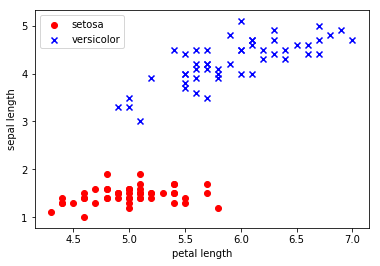

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# the next lines will filter the dataset
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[0:100, [0,2]].values

# the next lines will make the scatter plot 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()